# Crowdsourcing salient information from news and tweets

This repository contains preliminary work results for identifying linguistic features for novelty detection in news and tweets. We report here results of a crowdsourcing experimental pipeline of assessing the relevance of various tweets and news article snippets and the sentiments and intensities they indicate. The main focus of this dataset if to gather initial relevant and novel information insights, with regard to the event of "<b><a href="https://en.wikipedia.org/wiki/Whaling">whaling</a></b>". 

All the crowdsourcing experiments were performed through the CrowdTruth platform, while the results were processed and analyzed using the CrowdTruth methodology and metrics. For more information, check the <b><a href="http://crowdtruth.org/">CrowdTruth</a></b> website. For gathering the annotated data, we used the <b><a href="http://corwdflower.com/">CrowdFlower</a></b> marketplace.


## Download the data: <a href="https://github.com/CrowdTruth/Salience-In-News-And-Tweets">Salience-In-News-And-Tweets</a>


## Dataset Files:

```
|--/aggregate
```
Various aggregated datasets collected as part of collecting the salient features in news and tweets workflow. We describe here the most important files:

```
|--/aggregate/aggregatedResults_newsArticles.csv
```
This file contains the processed ground truth for the news articles related to the whaling event, in comma-separated format. The file contains aggregated results of the snippets relevance and the snippets and relevant event mentions sentiment and intensity. The columns are:

* *Dataset*: reference to the dataset, DS1
* *Unit Id*: unique ID of the data entry
* *Title Id*: news article unique title ID
* *Title*: news article title
* *Snippet Id*: news article unique snippet ID
* *Snippet*: news article snippet
* *Overlapping Snippet*: binary value describing whether the snippet contains overlapping tokens with the title (1) or not (0)
* *Snippet Relevance Score*: the snippet relevance score; computed using the cosine similarity measure, shows the likelihood that the given snippet is relevant for the news article title
* *Number of Relevant Mentions*: total number of relevant event mentions identified by the crowd in the given snippet
* *Overall Sentiment-Intensity*: binary value describing whether the following columns contain sentiment and intensity scores for the snippet (1) or for the relevant event mentions identified in the given snippet (0)
* *Relevant Mention*: relevant event mention
* *Relevant Mention Score*: the event mention relevance score; computed using the cosine similarity measure, shows the likelihood that the given mention in the snippet is relevant for the news article title
* *Positive Sentiment, Negative Sentiment, Neutral Sentiment*: the sentiment scores of the snippets and event mentions; computed using the cosine similarity measure, shows the likelihood that the given snippet or mention expresses the given sentiment
* *High Intensity, Low Intensity, Medium Intensity*: the intensity scores of the snippets and event mentions; computed using the cosine similarity measure, shows the likelihood that the given snippet or mention expresses a sentiment with the given intensity 

```
|--/aggregate/aggregatedResults_tweets2014&2015.csv
```
This file contains the processed ground truth for the tweets related to the whaling event - from 2014 and 2015, in comma-separated format. The file contains aggregated results of the tweets relevance, tweets relevant event mentions and the sentiment and intensity of the overall tweet and event mentions. The columns are:

* *Dataset*: reference to the dataset, DS2 - 2014 tweets, DS3 - 2015 tweets
* *Tweet Id*: unique ID of the tweet data entry
* *Tweet Author*: tweet author
* *Tweet Date*: tweet date
* *Tweet Seed Index*: unique tweet-event ID
* *Tweet Content*: tweet content
* *Tweet Event Relevance Score*: the tweet relevance score with regard to the whaling event; computed using the cosine similarity measure, shows the likelihood that the given tweet is relevant for the whaling event
* *Number of Relevant Mentions*: total number of relevant event mentions identified by the crowd in the given tweet
* *Overall Sentiment-Intensity*: binary value describing whether the following columns contain sentiment and intensity scores for the tweet (1) or for the relevant event mentions identified in the given tweet (0)
* *Relevant Mention*: relevant event mention
* *Relevant Mention Score*: the event mention relevance score; computed using the cosine similarity measure, shows the likelihood that the given mention in the tweet is relevant for the whaling event
* *Positive Sentiment, Negative Sentiment, Neutral Sentiment*: the sentiment scores of the tweet and event mentions; computed using the cosine similarity measure, shows the likelihood that the given tweet or mention expresses the given sentiment
* *High Intensity, Low Intensity, Medium Intensity*: the intensity scores of the tweet and event mentions; computed using the cosine similarity measure, shows the likelihood that the given tweet or mention expresses a sentiment with the given intensity 

```
|--aggregate/tweetsChangeInSentiment.csv
```
The file contains relevant event mentions in tweets that refer to "*whaling ban*". Each such relevant event mention has the associated sentiment and intensity acores.

```
|--/input
| |--/seedWords_domainExperts.csv
```
The file contains relevant seed words for the whaling event, obtained from the social sciences domain experts. Each column of the file represents a type: *Event*, *Location*, *Actor/Organization*, *Other*

```
|--/raw
| |--/Relevance Analysis
| |  |--/News
| |  |--/Tweets
| |--/Sentiment Analysis
| |  |--/News
| |  |--/Tweets
```
The raw data collected from crowdsourcing for each of the 2 tasks.



## Crowdsourcing Experiments:

The overall workflow consisted of two crowdsourcing tasks for each dataset, both news articles and tweets: 
    (1) identifying relevant snippets or tweets: "<b>Relevance Analysis</b>" task;
    (2) identifying the sentiment of each snippet or tweet and each relevant event mention identified in those snippets and tweets: "<b>Sentiment Analysis</b>" task. The crowdsourcing templates are shown below:
    
![Fig.1: CrowdTruth Workflow for Identifying Salient Features in News and Tweets.](https://raw.githubusercontent.com/CrowdTruth/Salience-In-News-And-Tweets/master/img/workflow_salient_features.jpg)

During the "<b>Relevance Analysis</b>" task, for the news articles dataset, the crowd is first asked to select all the relevant snippets with regard to the article title, where the title is considered as an expression of the event and then highlight in them all the relevant event mentions. For the tweets dataset, the crowd is asked to assign relevant events (from a list of predefined events) for each tweet and also highlight all the relevant event mentions in it. This results in a set of relevant snippets and tweets and a set of relevant event mentions in those. Using CrowdTruth cosine similarity metric we compute relevance scores for each snippet, tweet and event mention of the "whaling event".

During "<b>Sentiment Analysis</b>" we gather from the crowd the sentiment (in terms of positive, neutral or negative) and its intensity (high, medium, low) for (1) all event mentions identified in the "<b>Relevance Analysis</b>" task, and (2) the overall sentiment and its intensity of each snippet and tweet. Here again, we use the CrowdTruth cosine similarity metric to compute sentiment and intensity scores for each event mention, tweet or snippet.


## Experiments Results - News Articles

### Extract the relevant text snippets, overlapping and non-overlapping:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dfRelevantSnippets = pd.read_csv('aggregate/aggregatedResults_newsArticles.csv')

dfRelevantSnippets = dfRelevantSnippets.loc[dfRelevantSnippets['Snippet Relevance Score'] != 0]
dfRelevantSnippets = dfRelevantSnippets.loc[dfRelevantSnippets['Overall Sentiment-Intensity'] == 1]

relevantOverlappingSnippets = dfRelevantSnippets.loc[dfRelevantSnippets['Overlapping Snippet'] == 1]
relevantNonOverlappingSnippets = dfRelevantSnippets.loc[dfRelevantSnippets['Overlapping Snippet'] == 0]

orderedOverlapping = relevantOverlappingSnippets.sort(['Snippet Relevance Score'], ascending=[False])
orderedNonOverlapping = relevantNonOverlappingSnippets.sort(['Snippet Relevance Score'], ascending=[True])

orderedMentionsOverlapping = relevantOverlappingSnippets.sort(['Number of Relevant Mentions'], ascending=[False])
orderedMentionsNonOverlapping = relevantNonOverlappingSnippets.sort(['Number of Relevant Mentions'], ascending=[True])

frames = [orderedOverlapping, orderedNonOverlapping]
orderedDF = pd.concat(frames)

orderedDF = orderedDF.reset_index(drop=True)
orderedDF.reset_index(inplace=True)

The following two plots show the <b>distribution of the relevance scores of the text snippets</b> (overlapping with the title - blue, non-overlapping with the title - red) and the <b>distribution of the number of relevant mentions</b> identified by the crowd, across the relevant text snippets. As we can observe, the distribution of relevant mentions in a text snippet follows the same trend as the relevance score of the text snippets: the more relevant the text snippet, the more relevant mentions found by the crowd.

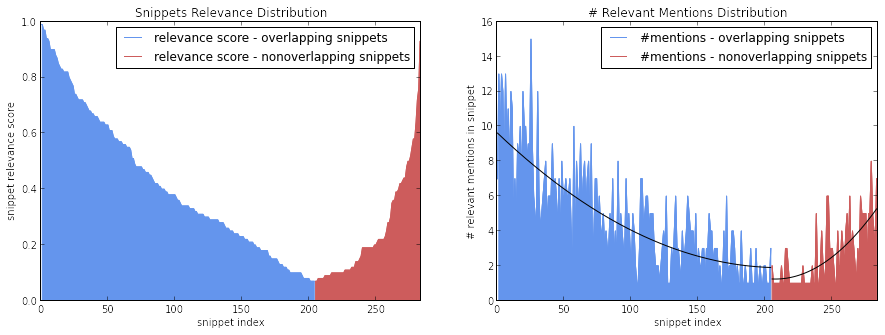

In [2]:
plt.rcParams['figure.figsize'] = 15, 5
plt.subplot(1, 2, 1)
plt.title('Snippets Relevance Distribution')
orderedDF['subset'] = np.select([orderedDF['Overlapping Snippet'] == 1, orderedDF['Overlapping Snippet'] == 0], ['relevance score - overlapping snippets', 'relevance score - nonoverlapping snippets'], -1)
for color, label in zip(['cornflowerblue', 'indianred'], ['relevance score - overlapping snippets', 'relevance score - nonoverlapping snippets', -1]):
    subset = orderedDF[orderedDF['subset'] == label]
    plt.plot(subset['index'], subset['Snippet Relevance Score'], c=color, label=str(label))
    plt.fill_between(subset['index'], subset['Snippet Relevance Score'], 0, where=subset['index'], color=color)
plt.xlim(0, len(orderedDF['index']))
plt.ylabel('snippet relevance score')
plt.xlabel('snippet index')
plt.legend()
#plt.show()

plt.subplot(1, 2, 2)
plt.title('# Relevant Mentions Distribution')
orderedDF['subset'] = np.select([orderedDF['Overlapping Snippet'] == 1, orderedDF['Overlapping Snippet'] == 0], ['#mentions - overlapping snippets', '#mentions - nonoverlapping snippets'], -1)
for color, label in zip(['cornflowerblue', 'indianred'], ['#mentions - overlapping snippets', '#mentions - nonoverlapping snippets', -1]):
    subset = orderedDF[orderedDF['subset'] == label]
    plt.plot(subset['index'], subset['Number of Relevant Mentions'], c=color, label=str(label))
    plt.fill_between(subset['index'], subset['Number of Relevant Mentions'], 0, where=subset['index'], color=color)
    z = np.polyfit(subset['index'],subset['Number of Relevant Mentions'],2)
    p = np.poly1d(z)
    plt.plot(subset['index'],subset['Number of Relevant Mentions'], color, subset['index'], p(subset['index']),'k-')
plt.xlim(0, len(orderedDF['index']))
plt.ylabel('# relevant mentions in snippet')
plt.xlabel('snippet index')
plt.legend()
plt.show()


### Correlation between the text snippet relevance score and the text snippet position in the article
- we take here as an example the article "25940", where the number represents the 'Title Id'. 

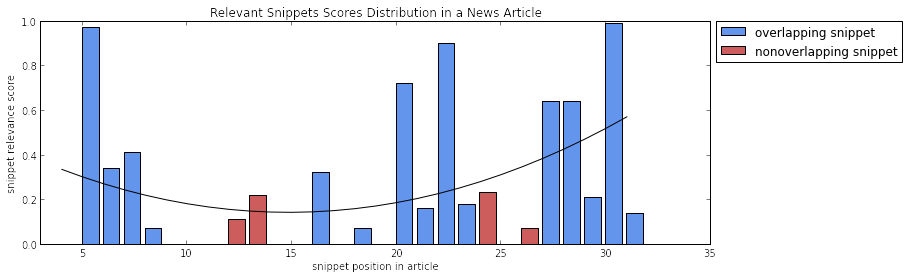

In [3]:
dfRelevantSnippets = pd.read_csv('aggregate/aggregatedResults_newsArticles.csv')
dfRelevantSnippets = dfRelevantSnippets.loc[dfRelevantSnippets['Overall Sentiment-Intensity'] != 0]

dfRelevantSnippets.sort(['Title Id'], ascending = [True], inplace = True)
dfRelevantSnippets['Title Snippet Index'] = [int(i.split('-')[0]) for i in dfRelevantSnippets['Snippet Id']]
dfRelevantSnippets.sort(['Title Id', 'Title Snippet Index'], ascending = [True, True], inplace = True)
chosenTitle = dfRelevantSnippets.loc[dfRelevantSnippets['Title Id'] == 25940]

plt.rcParams['figure.figsize'] = 12, 4
plt.title('Relevant Snippets Scores Distribution in a News Article')
chosenTitle['subset'] = np.select([chosenTitle['Overlapping Snippet'] == 1, chosenTitle['Overlapping Snippet'] == 0], ['overlapping snippet', 'nonoverlapping snippet'], -1)
for color, label in zip(['cornflowerblue', 'indianred'], ['overlapping snippet', 'nonoverlapping snippet', -1]):
    subset = chosenTitle[chosenTitle['subset'] == label]
    plt.bar(subset['Title Snippet Index'], subset['Snippet Relevance Score'], color=color, label=str(label))
z = np.polyfit(chosenTitle['Title Snippet Index'],chosenTitle['Snippet Relevance Score'],2)
p = np.poly1d(z)
plt.plot(chosenTitle['Title Snippet Index'], p(chosenTitle['Title Snippet Index']),'k-')
plt.xlim(3)
plt.ylabel('snippet relevance score')
plt.xlabel('snippet position in article')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

### Next, we generalize this across all the news articles by splitting each article into 3 parts: 
 - text snippets located at the beginning of the article
 - text snippets located in the middle of the article
 - text snippets that are located at the end of the article.

In [4]:
dfSnippetsPosition = pd.read_csv('aggregate/snippetsPositionInArticle.csv')
dfSnippetsPosition

,Snippets Position,# snippets with maximum relevance score,average maximum relevance score,average relevance score
0,Beginning,12,0.79,0.34
1,Middle,9,0.73,0.26
2,End,9,0.80,0.20


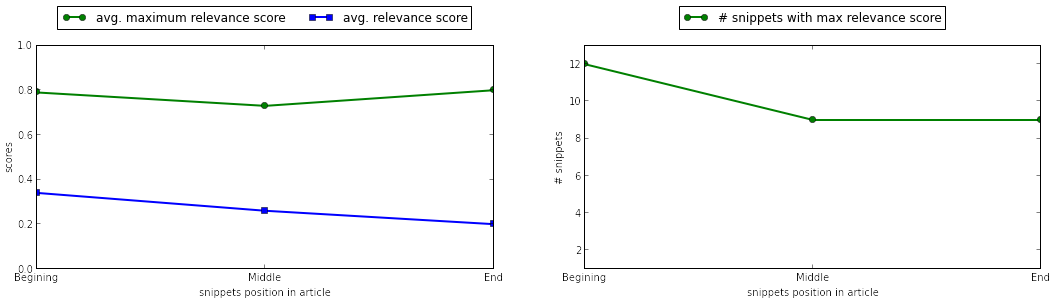

In [5]:
plt.rcParams['figure.figsize'] = [18.0, 4.0]

labels = ['Begining','Middle','End']
x = range(3)
plt.subplot(1, 2, 1)
plt.xticks(x, labels)
plt.plot(x, dfSnippetsPosition['average maximum relevance score'], '-o', color = 'g', lw = 2, label = "avg. maximum relevance score")
plt.plot(x, dfSnippetsPosition['average relevance score'], '-s', color = 'b', lw = 2, label = "avg. relevance score")
plt.ylim(0.0, 1.0)
plt.ylabel('scores')
plt.xlabel('snippets position in article')
plt.legend(loc=9, bbox_to_anchor=(0.5, 1.2), ncol=2)

plt.subplot(1, 2, 2)
plt.xticks(x, labels)
plt.plot(x, dfSnippetsPosition['# snippets with maximum relevance score '], '-o', color = 'g', lw = 2, label = "# snippets with max relevance score")
plt.ylim(1.0, 13.0)
plt.ylabel('# snippets')
plt.xlabel('snippets position in article')
plt.legend(loc=9, bbox_to_anchor=(0.5, 1.2), ncol=2)

### Overview of the sentiment distribution for the relevant snippets

In [6]:
dfRelevantSnippets = dfRelevantSnippets.loc[dfRelevantSnippets['Snippet Relevance Score'] != 0]
overallSentiment = dfRelevantSnippets.sort(['Positive Sentiment', 'Negative Sentiment'], ascending=[False, True])
overallSentiment = overallSentiment.reset_index(drop=True)
overallSentiment.reset_index(inplace=True)

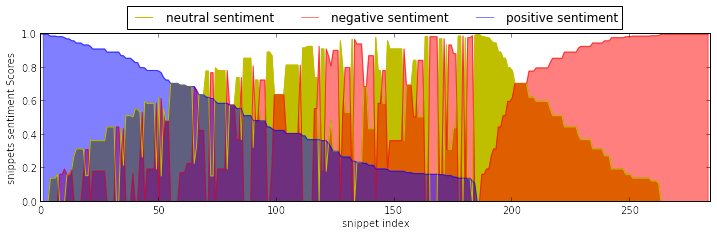

In [7]:
plt.rcParams['figure.figsize'] = 12, 3
plt.plot(overallSentiment['index'], overallSentiment['Neutral Sentiment'], color = 'y', lw = 1, label = "neutral sentiment")
plt.fill_between(overallSentiment['index'], overallSentiment['Neutral Sentiment'], 0, where=overallSentiment['index'], color='y')
plt.plot(overallSentiment['index'], overallSentiment['Negative Sentiment'], color = 'r', lw = 1, label = "negative sentiment" , alpha='0.5')
plt.fill_between(overallSentiment['index'], overallSentiment['Negative Sentiment'], 0, where=overallSentiment['index'], color='r', alpha='0.5')
plt.plot(overallSentiment['index'], overallSentiment['Positive Sentiment'], color = 'b', lw = 1, label = "positive sentiment", alpha='0.5')
plt.fill_between(overallSentiment['index'], overallSentiment['Positive Sentiment'], 0, where=overallSentiment['index'], color='b', alpha='0.5')
plt.xlim(0, len(overallSentiment['index']))
plt.ylabel('snippets sentiment Scores')
plt.xlabel('snippet index')
plt.legend(loc=9, bbox_to_anchor=(0.5, 1.2), ncol=3)


## Experiments Results - Tweets (2014 - 2015)

We merge the results of the two tweets datasets (from 2014 and 2015) and use their aggregation for the rest of the analysis. 

In [8]:
dfTweets = pd.read_csv('aggregate/aggregatedResults_tweets2014&2015.csv')
dfRelevantTweets = dfTweets.loc[dfTweets['Overall Sentiment-Intensity'] == 1]
orderedTweets = dfRelevantTweets.sort(['Tweet Event Relevance Score'], ascending=[False])
orderedDF = orderedTweets.reset_index(drop=True)
orderedDF.reset_index(inplace=True)

dfRelevantTweets = dfRelevantTweets.dropna(subset = ['Number of Relevant Mentions'])
dfRelevantMentions = dfRelevantTweets.sort(['Tweet Event Relevance Score'], ascending=[False])
orderedMentions = dfRelevantMentions.reset_index(drop=True)
orderedMentions.reset_index(inplace=True)

histDF = pd.DataFrame(columns=['Relevance Interval', 'Tweets Count'])
histDF['Relevance Interval'] = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
histDF['Tweets Count'] = [orderedDF[(orderedDF['Tweet Event Relevance Score'] == 1)].count()['index'], 
                          orderedDF[(orderedDF['Tweet Event Relevance Score'] >= 0.9) & (orderedDF['Tweet Event Relevance Score'] < 0.999)].count()['index'], 
                          orderedDF[(orderedDF['Tweet Event Relevance Score'] >= 0.8) & (orderedDF['Tweet Event Relevance Score'] < 0.899)].count()['index'], 
                          orderedDF[(orderedDF['Tweet Event Relevance Score'] >= 0.7) & (orderedDF['Tweet Event Relevance Score'] < 0.799)].count()['index'],
                          orderedDF[(orderedDF['Tweet Event Relevance Score'] >= 0.6) & (orderedDF['Tweet Event Relevance Score'] < 0.699)].count()['index'],
                          orderedDF[(orderedDF['Tweet Event Relevance Score'] >= 0.5) & (orderedDF['Tweet Event Relevance Score'] < 0.599)].count()['index'],
                          orderedDF[(orderedDF['Tweet Event Relevance Score'] >= 0.4) & (orderedDF['Tweet Event Relevance Score'] < 0.499)].count()['index'],
                          orderedDF[(orderedDF['Tweet Event Relevance Score'] >= 0.3) & (orderedDF['Tweet Event Relevance Score'] < 0.399)].count()['index'],
                          orderedDF[(orderedDF['Tweet Event Relevance Score'] >= 0.2) & (orderedDF['Tweet Event Relevance Score'] < 0.299)].count()['index']]

### Overview of: 
* ### tweets-event relevance score distribution
* ### number of relevant event mentions identified by the crowd
* ### histogram of tweet-event relevance score

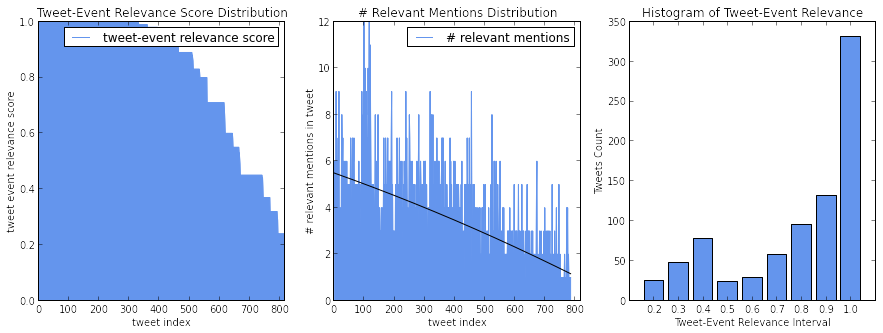

In [9]:
plt.rcParams['figure.figsize'] = 15, 5
plt.subplot(1, 3, 1)
plt.title('Tweet-Event Relevance Score Distribution')
plt.plot(orderedDF['index'], orderedDF['Tweet Event Relevance Score'], c='cornflowerblue', label='tweet-event relevance score')
plt.fill_between(orderedDF['index'], orderedDF['Tweet Event Relevance Score'], 0, where=orderedDF['index'], color='cornflowerblue')
plt.xlim(0, len(orderedDF['index']))
plt.ylabel('tweet event relevance score')
plt.xlabel('tweet index')
plt.legend()

plt.subplot(1, 3, 2)
plt.title('# Relevant Mentions Distribution')
plt.plot(orderedMentions['index'], orderedMentions['Number of Relevant Mentions'], c='cornflowerblue', label='# relevant mentions')
plt.fill_between(orderedMentions['index'], orderedMentions['Number of Relevant Mentions'], 0, where=orderedMentions['index'], color='cornflowerblue')
z = np.polyfit(orderedMentions['index'],orderedMentions['Number of Relevant Mentions'],2)
p = np.poly1d(z)
plt.plot(orderedMentions['index'], p(orderedMentions['index']),'k-')
plt.xlim(0, len(orderedDF['index']))
plt.ylabel('# relevant mentions in tweet')
plt.xlabel('tweet index')
plt.legend()

plt.subplot(1, 3, 3)
plt.bar(histDF['Relevance Interval'], histDF['Tweets Count'], width = 0.08, color='cornflowerblue',align='center')
plt.title("Histogram of Tweet-Event Relevance")
plt.xlabel("Tweet-Event Relevance Interval")
plt.ylabel("Tweets Count")
plt.xticks(histDF['Relevance Interval'])
plt.show()

### Change in sentiment for relevant event mentions of "*whaling ban*"

We extracted from the tweets datasets, DS2 and DS3, a subset of the tweets identified as relevant by the crowd and containing relevant event mentions "whaling ban". There is a strong positive sentiment about the decision to ban whaling in Japan. However, this drastically transforms into a negative sentiment immediately after facts such as Japan plans to continue whaling are published.  

In [10]:
dfTweetsSentiment = pd.read_csv('aggregate/tweetsChangeInSentiment.csv')
dfTweetsSentiment = dfTweetsSentiment.reset_index(drop=True)
dfTweetsSentiment.reset_index(inplace=True)
dfTweetsSentiment

,index,Relevant Mention,Positive Sentiment,Negative Sentiment,Neutral Sentiment,High Intensity,Low Intensity,Medium Intensity
0,0,Finds Way Around Ban,0.00,0.99,0.14,0.20,0.78,0.59
1,1,Japan changes its mind about Antarctic whaling...,0.00,0.37,0.93,0.00,0.93,0.37
2,2,Japan finds way around ban on whaling,0.08,0.78,0.45,0.19,0.77,0.49
3,3,Japan changes its mind about Antarctic whaling...,0.15,0.88,0.44,0.14,0.95,0.27
4,4,whaling fleet leaves Japan since UN hunting ba...,0.22,0.44,0.87,0.23,0.69,0.69
5,5,Japanese whaling fleet leaves port weeks after...,0.27,0.80,0.53,0.00,0.71,0.71
6,6,International court delivers ban verdict,0.45,0.00,0.89,0.00,0.98,0.20
7,7,Japan Accepted Court ban on Antarctic Whaling,0.55,0.53,0.39,0.00,0.73,0.59
8,8,Japan accepts court ban,0.55,0.00,0.83,0.00,0.83,0.55
9,9,Antarctic whaling ban,0.63,0.22,0.70,0.04,0.87,0.40


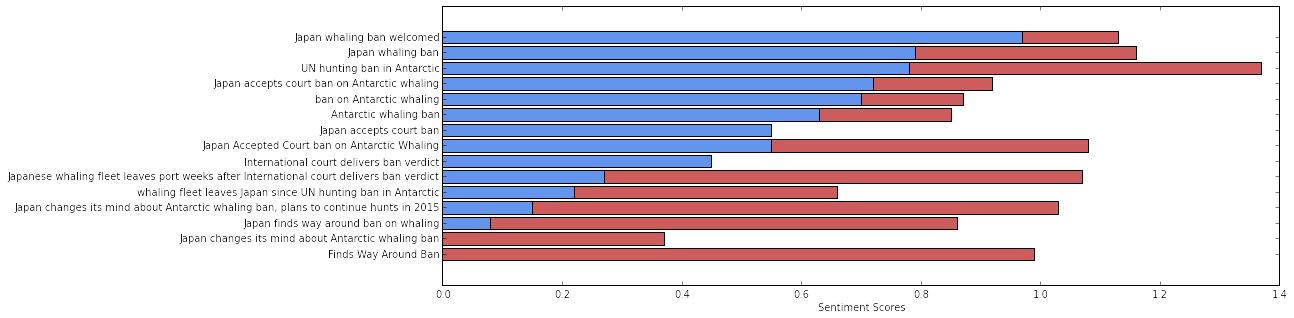

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
yLabels = dfTweetsSentiment['Relevant Mention'].tolist()
y_pos = np.arange(len(yLabels))
ax.barh(y_pos, dfTweetsSentiment['Positive Sentiment'], color='cornflowerblue',align='center')
lefts = dfTweetsSentiment['Positive Sentiment']
ax.barh(y_pos, dfTweetsSentiment['Negative Sentiment'], color='indianred', left=lefts,align='center')
lefts = lefts + dfTweetsSentiment['Negative Sentiment']
ax.set_yticks(y_pos)
ax.set_yticklabels(yLabels)
ax.set_xlabel('Sentiment Scores')
plt.show()